## Reto 3: Gráficas de Dispersión

### 1. Objetivos:
    - Aprender a generar e interpretar gráficas de dispersión
    - Utilizar gráficas de dispersión para complementar el análisis hecho con la matriz de correlación
 
---
    
### 2. Desarrollo:

Espero que haya quedado claro en el Ejemplo pasado que las gráficas de dispersión pueden ser extremadamente útiles para encontrar incosistencias, errores y valores atípicos en nuestro dataset.

Vamos a complementar el análisis realizado en el Reto pasado con unas gráficas de dispersión. El objetivo de este Reto es utilizar todas las herramientas que hemos acumulado hasta el momento para preparar nuestro dataset para realizar predicciones con él. Vamos a volver a utilizar el dataset 'wine_quality_red-clean.csv'. Realiza los siguientes pasos:

1. Vuelve a generar tu matriz de correlaciones para tenerla disponible
2. Realiza gráficas de dispersión de los pares de variables que parezcan más prometedores (en los que la fuerza de la correlación sea más fuerte)
3. También realiza gráficas de dispersión de los pares de variables que no tengan un coeficiente de correlación alto, **pero** que tú creas intuitivamente que *deberían* de tener una correlación.
4. Utilizando estas gráficas de dispersión, y complementando el análisis con promedios, medianas, desviación estándar, boxplots e histogramas, elimina del dataset los valores que consideres como atípicos.
5. Crea una nueva matriz de correlación para ver si tus coeficientes han sido modificados o no.
6. Comenta con tus compañeros y la experta tus hallazgos.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [53]:
df = pd.read_csv("https://raw.githubusercontent.com/beduExpert/B2-Analisis-de-Datos-con-Python-2020-Santander/main/Datasets/wine_quality_red-clean.csv", index_col=0)

In [54]:
corr_mat = df.corr()
corr_mat[abs(corr_mat) > 0.5]

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
fixed_acidity,1.000000,NaN,0.671703,NaN,NaN,NaN,NaN,0.668047,-0.682978,NaN,NaN,NaN
volatile_acidity,NaN,1.000000,-0.552496,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
citric_acid,0.671703,-0.552496,1.000000,NaN,NaN,NaN,NaN,NaN,-0.541904,NaN,NaN,NaN
residual_sugar,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
chlorides,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
free_sulfur_dioxide,NaN,NaN,NaN,NaN,NaN,1.000000,0.667666,NaN,NaN,NaN,NaN,NaN
total_sulfur_dioxide,NaN,NaN,NaN,NaN,NaN,0.667666,1.000000,NaN,NaN,NaN,NaN,NaN
density,0.668047,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN
pH,-0.682978,NaN,-0.541904,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN
sulphates,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN


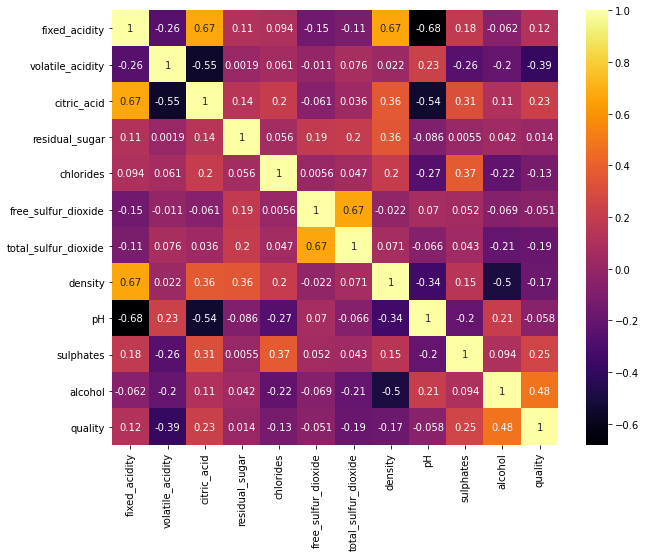

In [55]:
plt.figure(figsize = (10, 8))
sns.heatmap(data = corr_mat, annot=True, cmap="inferno");

Corr: 0.671703434764106


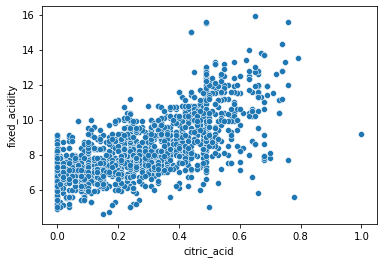

In [23]:
sns.scatterplot(x=df["citric_acid"], y=df["fixed_acidity"]);
print(f'Corr: {df["citric_acid"].corr(df["fixed_acidity"])}')

Corr: -0.5524956845595799


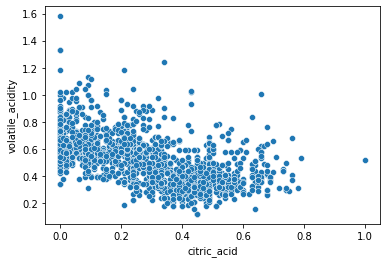

In [24]:
sns.scatterplot(x=df["citric_acid"], y=df["volatile_acidity"]);
print(f'Corr: {df["citric_acid"].corr(df["volatile_acidity"])}')

Corr: 0.6680472921189741


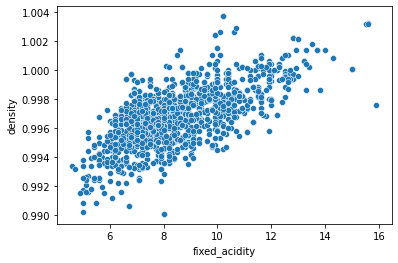

In [25]:
sns.scatterplot(x=df["fixed_acidity"], y=df["density"]);
print(f'Corr: {df["fixed_acidity"].corr(df["density"])}')

Corr: -0.6829781945685316


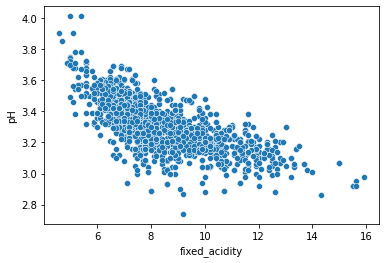

In [26]:
sns.scatterplot(x=df["fixed_acidity"], y=df["pH"]);
print(f'Corr: {df["fixed_acidity"].corr(df["pH"])}')

Corr: -0.5419041447395098


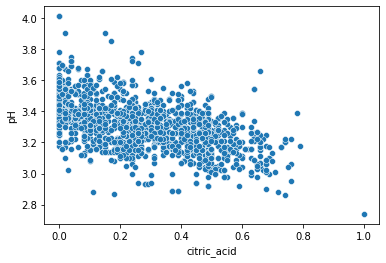

In [27]:
sns.scatterplot(x=df["citric_acid"], y=df["pH"]);
print(f'Corr: {df["citric_acid"].corr(df["pH"])}')

Corr: 0.6676664504810219


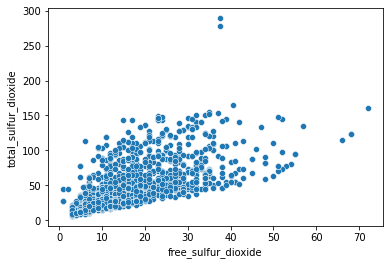

In [28]:
sns.scatterplot(x=df["free_sulfur_dioxide"], y=df["total_sulfur_dioxide"]);
print(f'Corr: {df["free_sulfur_dioxide"].corr(df["total_sulfur_dioxide"])}')

In [10]:
vals_df = pd.DataFrame(index=df.columns)
vals_df = pd.concat([df.max(), df.min(), df.mean(), df.median(), df.std()], axis=1)
vals_df.columns = ["Max", "Min", "Mean", "Median", "Std"]
vals_df

,Max,Min,Mean,Median,Std
fixed_acidity,15.90000,4.60000,8.319637,7.90000,1.741096
volatile_acidity,1.58000,0.12000,0.527821,0.52000,0.179060
citric_acid,1.00000,0.00000,0.270976,0.26000,0.194801
residual_sugar,15.50000,0.90000,2.538806,2.20000,1.409928
chlorides,0.61100,0.01200,0.087467,0.07900,0.047065
free_sulfur_dioxide,72.00000,1.00000,15.874922,14.00000,10.460157
total_sulfur_dioxide,289.00000,6.00000,46.467792,38.00000,32.895324
density,1.00369,0.99007,0.996747,0.99675,0.001887
pH,4.01000,2.74000,3.311113,3.31000,0.154386
sulphates,2.00000,0.33000,0.658149,0.62000,0.169507


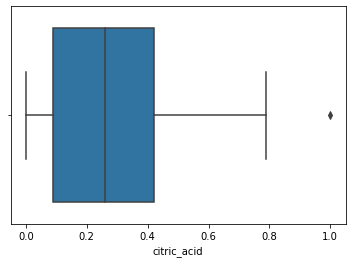

In [34]:
sns.boxplot(x=df["citric_acid"])

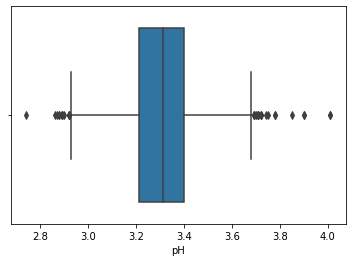

In [35]:
sns.boxplot(x=df["pH"])

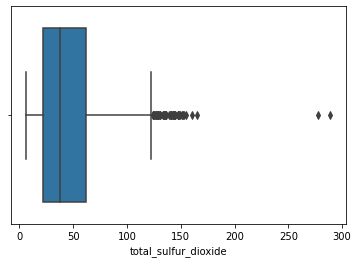

In [37]:
sns.boxplot(x=df["total_sulfur_dioxide"]);

In [38]:
new_df = df[(df["total_sulfur_dioxide"] < df["total_sulfur_dioxide"].quantile(0.75))]

In [57]:
new_corr_mat = new_df.corr()
new_corr_mat[abs(corr_mat) > 0.5]

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
fixed_acidity,1.000000,NaN,0.721120,NaN,NaN,NaN,NaN,0.689984,-0.743535,NaN,NaN,NaN
volatile_acidity,NaN,1.000000,-0.619052,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
citric_acid,0.721120,-0.619052,1.000000,NaN,NaN,NaN,NaN,NaN,-0.586457,NaN,NaN,NaN
residual_sugar,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
chlorides,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
free_sulfur_dioxide,NaN,NaN,NaN,NaN,NaN,1.000000,0.737345,NaN,NaN,NaN,NaN,NaN
total_sulfur_dioxide,NaN,NaN,NaN,NaN,NaN,0.737345,1.000000,NaN,NaN,NaN,NaN,NaN
density,0.689984,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN
pH,-0.743535,NaN,-0.586457,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN
sulphates,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN


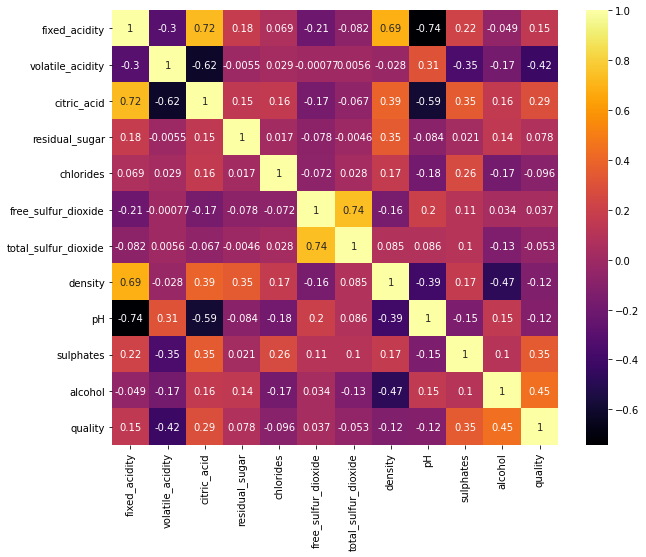

In [58]:
plt.figure(figsize = (10, 8))
sns.heatmap(data = new_corr_mat, annot=True, cmap="inferno");